**Q.1: Import data and check null values, check column info and the descriptive statistics of the data.**

In [34]:
import pandas as pd

# Load the dataset
data = pd.read_csv('tips.csv')

# Check for null values
null_values = data.isnull().sum()

# Column info
column_info = data.info()

# Descriptive statistics
descriptive_stats = data.describe()

# Print the results
print("Null Values:")
print(null_values)
print("\nColumn Info:")
print(column_info)
print("\nDescriptive Statistics:")
print(descriptive_stats)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
Null Values:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Column Info:
None

Descriptive Statistics:
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000 

**Q2. Tips Given to Waiters by Total Bill, Number of People, and Day of the Week**

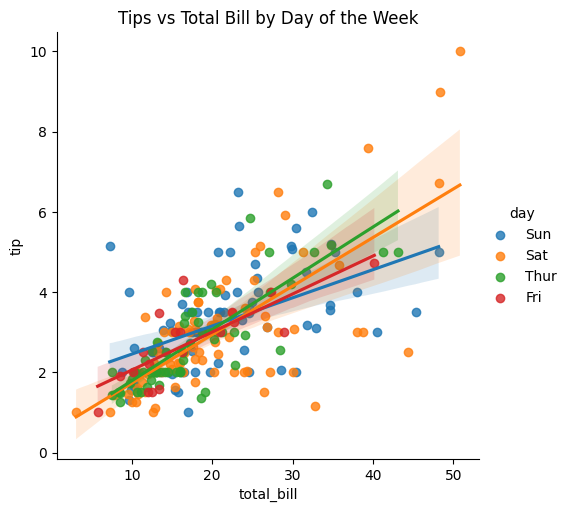

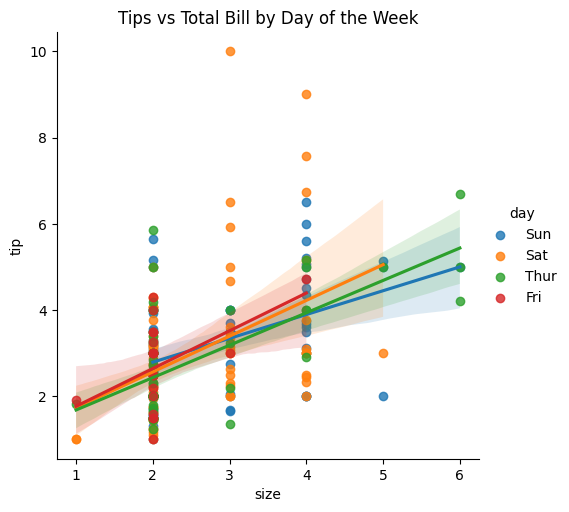

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(x="total_bill", y="tip", hue="day", data=data)
plt.title("Tips vs Total Bill by Day of the Week")
plt.show()
sns.lmplot(x="size", y="tip", hue="day", data=data)
plt.title("Tips vs Total Bill by Day of the Week")
plt.show()

**Q3. Tips Given to Waiters by Total Bill, Number of People, and Gender**

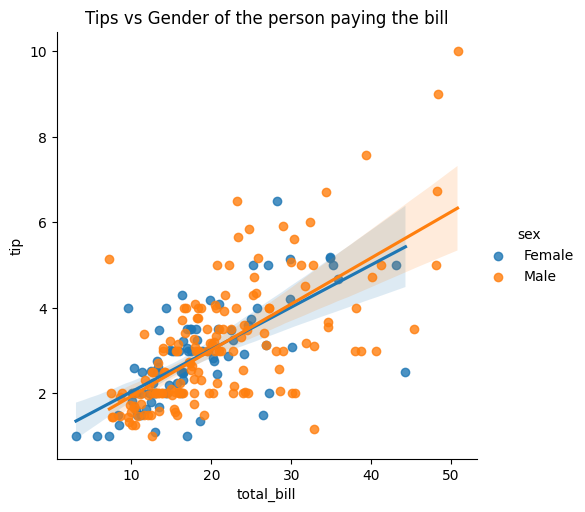

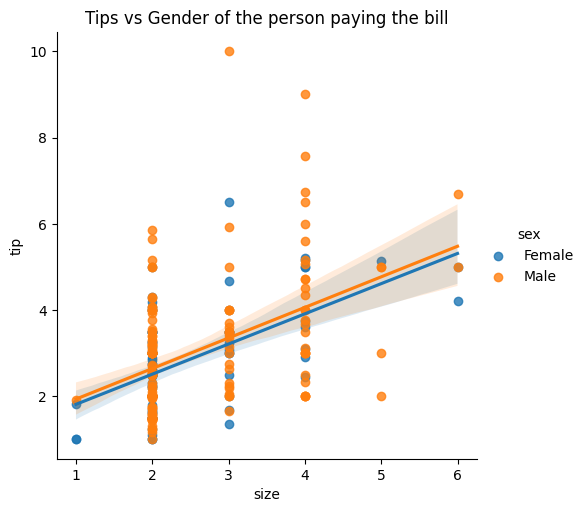

In [36]:
sns.lmplot(x="total_bill", y="tip", hue="sex", data=data)
plt.title("Tips vs Gender of the person paying the bill")
plt.show()
sns.lmplot(x="size", y="tip", hue="sex", data=data)
plt.title("Tips vs Gender of the person paying the bill")
plt.show()

**Q4. Tips Given to Waiters by Total Bill, Number of People, and Time of Meal**

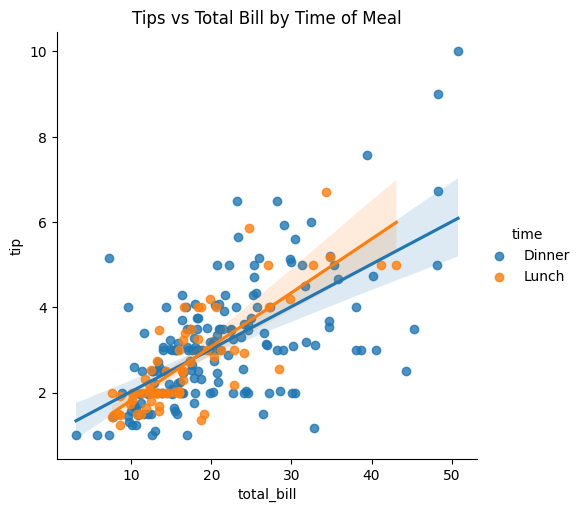

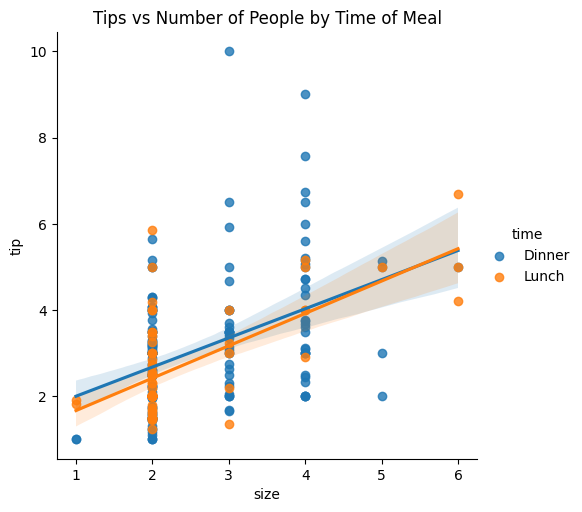

In [37]:
sns.lmplot(x="total_bill", y="tip", hue="time", data=data)
plt.title("Tips vs Total Bill by Time of Meal")
plt.show()
sns.lmplot(x="size", y="tip", hue="time", data=data)
plt.title("Tips vs Number of People by Time of Meal")
plt.show()

**Q5. Which Day Most Tips are Given**

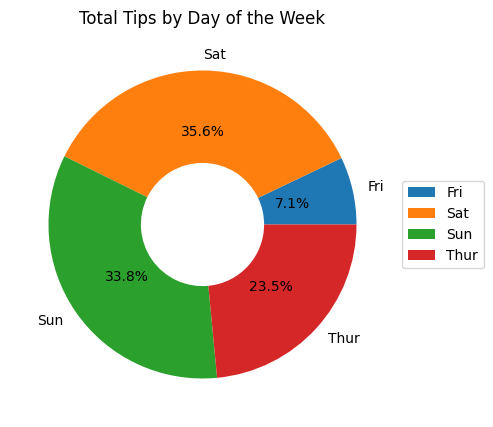

In [39]:
tips_by_day = data.groupby('day')['tip'].sum().reset_index()

total_tips = tips_by_day['tip'].sum()

tips_by_day['percentage'] = tips_by_day['tip'] / total_tips * 100

labels = tips_by_day['day'].tolist()
values = tips_by_day['percentage'].tolist()

plt.figure(figsize=(8, 5))
wedgeprops = {'width': 0.6}

plt.pie(values, labels=labels, autopct="%1.1f%%", wedgeprops=wedgeprops)
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Total Tips by Day of the Week')
plt.show()

**Q6. Tips Given by Gender**

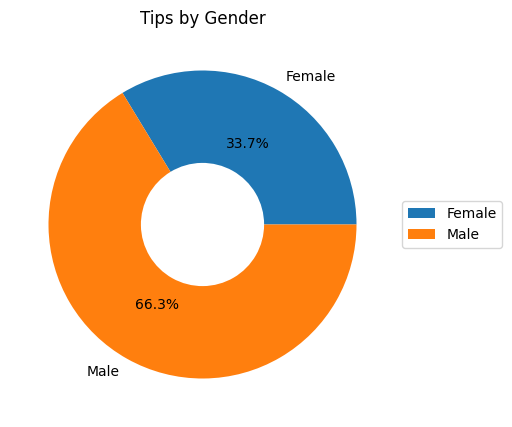

In [40]:
tips_by_gender = data.groupby('sex')['tip'].sum().reset_index()
total_tips = tips_by_gender['tip'].sum()
tips_by_gender['percentage'] = tips_by_gender['tip'] / total_tips * 100

labels = tips_by_gender['sex'].tolist()
values = tips_by_gender['percentage'].tolist()

plt.figure(figsize=(8, 5))
wedgeprops = {'width': 0.6}
plt.pie(values, labels=labels, autopct="%1.1f%%", wedgeprops=wedgeprops)
plt.gca().set_prop_cycle('color', ['skyblue', 'pink'])
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Tips by Gender')
plt.show()

**Q7. Tips Given by Day (Repetition)**

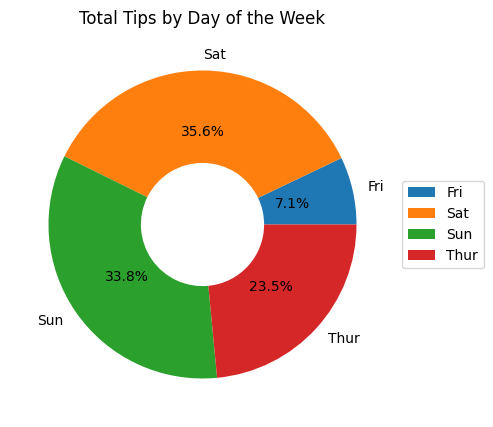

In [41]:
tips_by_day = data.groupby('day')['tip'].sum().reset_index()

total_tips = tips_by_day['tip'].sum()

tips_by_day['percentage'] = tips_by_day['tip'] / total_tips * 100

labels = tips_by_day['day'].tolist()
values = tips_by_day['percentage'].tolist()

plt.figure(figsize=(8, 5))
wedgeprops = {'width': 0.6}

plt.pie(values, labels=labels, autopct="%1.1f%%", wedgeprops=wedgeprops)
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Total Tips by Day of the Week')
plt.show()

**Q8. Tips Given by Smoker or Non-Smoker**

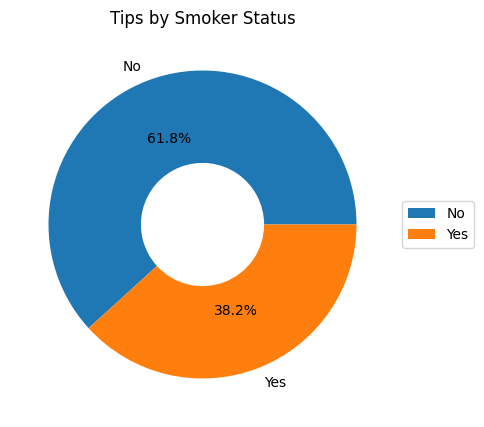

In [42]:
tips_by_smoker = data.groupby('smoker')['tip'].sum().reset_index()
total_tips = tips_by_smoker['tip'].sum()
tips_by_smoker['percentage'] = tips_by_smoker['tip'] / total_tips * 100

labels = tips_by_smoker['smoker'].tolist()
values = tips_by_smoker['percentage'].tolist()

plt.figure(figsize=(8, 5))
wedgeprops = {'width': 0.6}
plt.pie(values, labels=labels, autopct="%1.1f%%", wedgeprops=wedgeprops)
plt.gca().set_prop_cycle('color', ['lightcoral', 'lightgreen'])
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Tips by Smoker Status')
plt.show()

**Q9. Tips Given During Lunch or Dinner**

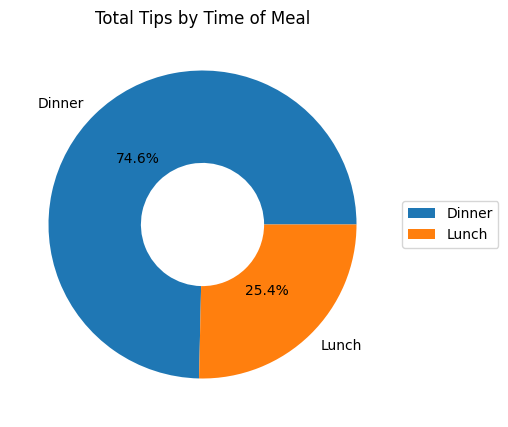

In [43]:
tips_by_time = data.groupby('time')['tip'].sum().reset_index()
total_tips = tips_by_time['tip'].sum()
tips_by_time['percentage'] = tips_by_time['tip'] / total_tips * 100

labels = tips_by_time['time'].tolist()
values = tips_by_time['percentage'].tolist()

plt.figure(figsize=(8, 5))
wedgeprops = {'width': 0.6}
plt.pie(values, labels=labels, autopct="%1.1f%%", wedgeprops=wedgeprops)
plt.gca().set_prop_cycle('color', ['gold', 'lightcoral', 'lightskyblue'])
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Total Tips by Time of Meal')
plt.show()

**Q10. Data Transformation (Categorical to Numerical)**

In [44]:
data['sex'] = data['sex'].map({'Female': 0, 'Male': 1})
data['smoker'] = data['smoker'].map({'No': 0, 'Yes': 1})
data['day'] = data['day'].map({'Thur': 0, 'Fri': 1, 'Sat': 2, 'Sun': 3})
data['time'] = data['time'].map({'Lunch': 0, 'Dinner': 1})

data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


**Q11. Split Data and Train Linear Regression Model**

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = data[['total_bill', 'sex', 'smoker', 'day', 'time', 'size']]
y = data['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
accuracy

0.4429399687489898

**Q12. Model Prediction**

In [50]:
input_data = [[24.50, 1, 0, 0, 1, 4]]
predicted_tip = model.predict(input_data)

print("#############################")
print("Predicted Tip:",predicted_tip)
print("#############################")

#############################
Predicted Tip: [3.73742609]
#############################


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
